In [1]:
from pylab import np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [2]:

def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1 using derivative y'_i
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def pendulum( y, t):  #  2x first order ODEs for damped, driven pendulum
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0])
    diff1 -= 2.*beta*y[1] # domega/dt = −(g/L)*sin(theta)
    diff1 += alpha*np.cos(omega_F*t)
    return np.array([diff0, diff1])

natural freq. 1.0


(0.0, 0.0015)

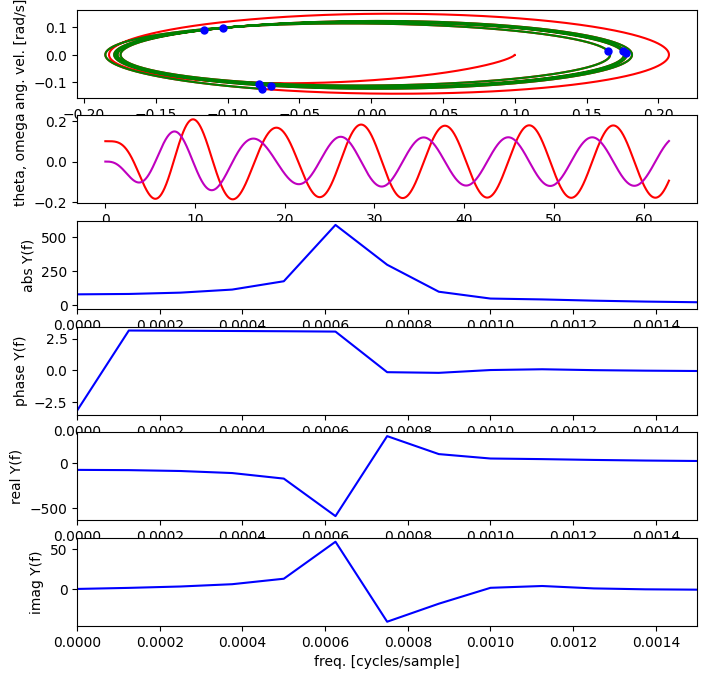

In [23]:
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.1 # damping constant [s^-1]
alpha = 0.1 # magnitude of driving force [N], 0.9, 1,05, 1.07, 1.079, 1.080, ...
omega_F = 0.67 # magnitude of driving force [s^-1]
print("natural freq.", np.sqrt(g/L))

theta_o = 0.1 # initial angle [radians]
omega_o = 0.0 # inital angular velocity [rad/s]

Nsteps = 10000 # number of steps
Nperiods = 10 # number of oscillation periods
tf = 2.*np.pi*Nperiods/(np.sqrt(g/L)) # time range in nat freq. / drv. period units
dt = tf/float(Nsteps-1) # time step [s]

t = np.linspace(0, tf, Nsteps) # Nx1 evenly spaced t_i time array
theta = np.zeros([Nsteps,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i stat
theta[0,0] = theta_o
theta[0,1] = omega_o

for j in range(Nsteps-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)

theta_n = theta[:,0].copy()
omega_n = theta[:,1].copy()
theta_np = (theta_n+np.pi)%(2.*np.pi)-np.pi

Nsection = int(Nsteps/Nperiods)
Ntransient = 2000

Np = len(theta_np[Ntransient:])              # remove transient if appropriate
Y = fft(theta_np[Ntransient:])[:Np//2]       # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
f = fftfreq(Np,1.0)[:Np//2]                    # convert to k index of Y_k to freq, i.e., cycles per samples

fig, ax = plt.subplots(6,figsize=(8,8))

ax[0].plot(theta_n, omega_n, "r")
ax[0].plot(theta_n[Ntransient::], omega_n[Ntransient::], "g")
ax[0].plot(theta_n[Ntransient::Nsection], omega_n[Ntransient::Nsection], "bo", markersize=5)
ax[0].set_xlabel ('angle [rad]')
ax[0].set_ylabel ('ang. vel. [rad/s]')

ax[1].plot(t,theta_n,"r")
ax[1].plot(t,omega_n,"m")
ax[1].set_xlabel ('time [samples]')
ax[1].set_ylabel ('theta, omega')

ax[2].plot(f,np.abs(Y),"b")
ax[2].set_xlabel ('freq. [cycles/sample]')
ax[2].set_ylabel ('abs Y(f)')
ax[2].set_xlim(0.000,0.0015)

ax[3].plot(f,np.angle(Y),"b")
ax[3].set_xlabel ('freq. [cycles/sample]')
ax[3].set_ylabel ('phase Y(f)')
ax[3].set_xlim(0.000,0.0015)

ax[4].plot(f,np.real(Y),"b")
ax[4].set_xlabel ('freq. [cycles/sample]')
ax[4].set_ylabel ('real Y(f)')
ax[4].set_xlim(0.000,0.0015)

ax[5].plot(f,np.imag(Y),"b")
ax[5].set_xlabel ('freq. [cycles/sample]')
ax[5].set_ylabel ('imag Y(f)')
ax[5].set_xlim(0.000,0.0015)

(0.0, 100.0)

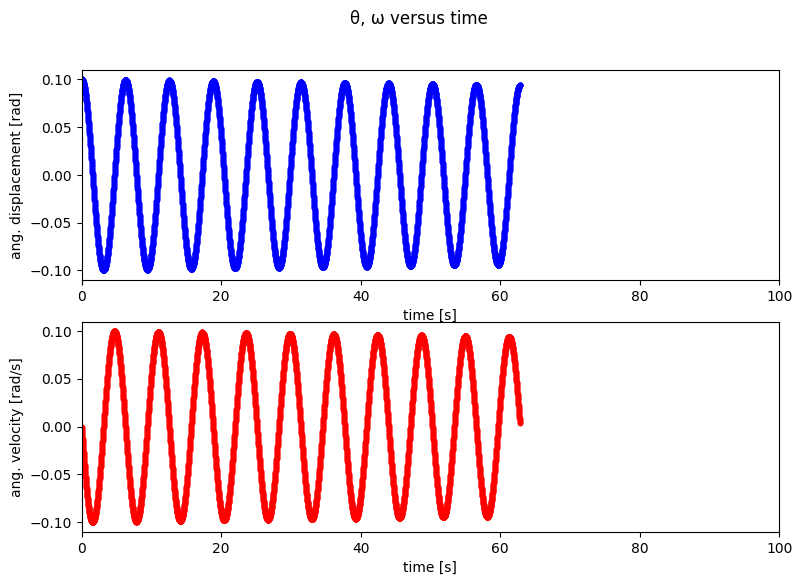

In [4]:
fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('θ, ω versus time')

axes[0].plot(t, theta_n, "b.", label='numerical')
axes[0].set_xlabel ('time [s]')
axes[0].set_ylabel ('ang. displacement [rad]')
axes[0].set_xlim(0,100)

axes[1].plot(t, omega_n, "r.")
axes[1].set_xlabel ('time [s]')
axes[1].set_ylabel ('ang. velocity [rad/s]')
axes[1].set_xlim(0,100)


(0.0, 200.0)

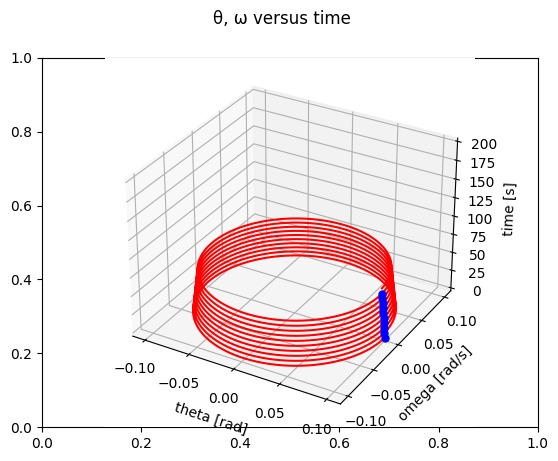

In [5]:
fig, ax = plt.subplots()
fig.suptitle('θ, ω versus time')
ax = plt.axes(projection='3d')
ax.plot3D(theta_n, omega_n, t, "r")
ax.plot3D(theta_n[Ntransient::Nsection], omega_n[Ntransient::Nsection], t[Ntransient::Nsection], "b.", markersize=10)
ax.set_xlabel('theta [rad]')
ax.set_ylabel('omega [rad/s]')
ax.set_zlabel('time [s]')
ax.set_zlim(0, 200)

# zero damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.0 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# under damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.05 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# critical damping
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 5.0 # damping constant [s^-1]
alpha = 0.0 # magnitude of driving force [N], 0.9, 1.07
omega_F = 1. # magnitude of driving force [s^-1]

# weak driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 0.1 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]


# alpha=0.9 driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 0.1 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]

# alpha=1.07 driving force
g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 1./3. # damping constant [s^-1]
alpha = 1.07 # magnitude of driving force [N], 0.9, 1.07
omega_F = 2./3. # magnitude of driving force [s^-1]


